# 01. Data exploration

## Data load

After loading with pandas de raw csv i saw that the first columns was the sample id so i renamed it and used it as an index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.rename(columns={'Unnamed: 0': 'sample_id'}, inplace=True)
df = df.set_index('sample_id')

df.to_csv('../data/interim/data_full.csv')

## DataFrame Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, CM.1.0001.1 to GSM1817999
Columns: 19022 entries, RPS28 to grado_histologico
dtypes: float64(19020), int64(1), object(1)
memory usage: 28.0+ MB


As expected, most of the columns are `float64` or `int64`, it stand out the one that is type `object`, so i printed it: 

In [4]:
df.select_dtypes(include="object").columns

Index(['cohorte'], dtype='object')

## First 10 lines

In [5]:
df.head(10)

,RPS28,IPO13,FAM86FP,CDT1,CCNE2,BORCS5,SNIP1,COL17A1,BCL6B,ATP13A4,...,MIRLET7A1,SNORD114.13,MIR335,MIR663B,MIR320C1,LINC00293,LINC00173,cohorte,relapse,grado_histologico
sample_id,,,,,,,,,,,,,,,,,,,,,
CM.1.0001.1,55.129882,5.457260,3.893584,3.819093,3.518993,3.871038,5.009624,4.210971,4.082086,3.672172,...,0.0,-12.36309,0.0,-161.048281,3.468996,3.685690,3.731565,cohorte_0,0,5.0
CM.1.0002.1,16.891456,5.046320,3.756069,3.544552,3.391771,3.695358,4.627079,4.205920,4.011827,3.672172,...,0.0,-12.36309,0.0,250.071137,3.468996,3.685690,3.931970,cohorte_0,1,2.0
CM.1.0003.1,23.506498,5.295902,3.779287,3.948647,3.441808,3.620516,4.790339,4.038352,3.926411,3.672172,...,0.0,-12.36309,0.0,-161.048281,3.468996,3.685690,3.896318,cohorte_0,1,3.0
CM.1.0004.1,17.002206,5.008650,3.801035,3.596709,3.602556,3.677360,4.871412,4.578110,3.998360,3.708737,...,0.0,-12.36309,0.0,-161.048281,3.468996,3.685690,3.798257,cohorte_0,1,3.0
CM.1.0005.1,20.857085,5.071531,3.843076,3.598753,3.448544,3.845062,4.918200,4.828720,3.932689,3.714921,...,0.0,-12.36309,0.0,-161.048281,3.468996,3.685690,3.914382,cohorte_0,1,2.0
CM.1.0008.1,39.429198,5.073246,4.150719,3.587952,3.608407,3.776755,4.820679,4.141664,4.064731,3.789557,...,0.0,-12.36309,0.0,309.924051,3.468996,3.685690,3.857032,cohorte_0,1,2.0
CM.1.0012.1,34.803848,5.311703,3.863307,3.750510,3.652392,4.027606,4.700582,4.317215,4.081822,3.672172,...,0.0,-12.36309,0.0,636.577296,3.468996,3.685690,4.354293,cohorte_0,1,1.0
CM.1.0013.1,7.942396,4.833823,3.718050,3.583922,3.391771,3.805493,4.468110,4.005420,3.918805,3.672172,...,0.0,-12.36309,0.0,570.149395,3.468996,3.685690,3.650491,cohorte_0,1,2.0
CM.1.0015.1,17.014088,4.852175,3.718050,3.929236,3.452933,3.693764,4.529921,4.021212,4.032689,3.710893,...,0.0,-12.36309,0.0,435.243350,3.468996,3.879357,3.997339,cohorte_0,1,5.0


## Overview of Clinical Variables

In [6]:
# Distribution of clinical variables
print("Grado histologico:")
print(df['grado_histologico'].value_counts(normalize=True))
print("\nRelapse:")
print(df['relapse'].value_counts(normalize=True))
print("\nCohorte:")
print(df['cohorte'].value_counts(normalize=True))


Grado histologico:
grado_histologico
2.0    0.450262
3.0    0.209424
1.0    0.178010
4.0    0.089005
5.0    0.073298
Name: proportion, dtype: float64

Relapse:
relapse
0    0.626943
1    0.373057
Name: proportion, dtype: float64

Cohorte:
cohorte
cohorte_0    0.398964
cohorte_9    0.352332
cohorte_8    0.248705
Name: proportion, dtype: float64


It has only 3 values so in case of needeed it could be change to only de number. 

The proportion of relapse seems to be balanced.

## Missing values

In [7]:
df.info()
df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, CM.1.0001.1 to GSM1817999
Columns: 19022 entries, RPS28 to grado_histologico
dtypes: float64(19020), int64(1), object(1)
memory usage: 28.0+ MB


grado_histologico    2
ZNF572               0
ANAPC4               0
NUF2                 0
APOC2                0
PIAS4                0
TREML3P              0
TRPV3                0
VKORC1L1             0
MMACHC               0
PPIL2                0
PRCC                 0
MTMR12               0
DEPDC1               0
AKIRIN1              0
CD163L1              0
C22orf15             0
DCAF12L1             0
ZNF185               0
GPR139               0
dtype: int64

Only `grado_histologico` has missing values, can be critical when used as class.

I save in `data/interim` a version without them

## Variance in Gene Expression

In [8]:
# Variance of each gene
gene_variances = df.iloc[:, :-3].var().sort_values(ascending=False)
print("Top 20 genes with highest variance:")
gene_variances.head(20)

Top 20 genes with highest variance:


SNORD58A    998349.549271
SNORD33     420520.074091
SNORD55     381755.457994
RPPH1       323785.198301
SNORD26     205842.892493
SNORD42A    200853.634551
SNORD102    158178.185664
RMRP        150595.664483
SNORD139    145405.205758
SNORD56     142901.909225
SNORD34     135029.800393
MIR663B     134101.332420
SNORD95      94703.893050
SNORD32A     92284.683130
MALAT1       84040.187809
MIR23A       83119.003704
SNORD68      80602.778114
SNORD44      73644.465479
SNORD79      68150.980014
SNORD65      67132.755579
dtype: float64

In [19]:
gene_variances = df.iloc[:, :-3].var().sort_values(ascending=True)
print("Top 20 genes with lower variance:")
gene_variances.head(20)

Top 20 genes with lower variance:


TTTY12      0.002809
TBATA       0.003184
TSPY4       0.003415
RSPH10B2    0.003500
OPN1LW      0.003516
TSGA10IP    0.003571
GAD2        0.003631
LYZL2       0.003639
SPX         0.003640
CGB5        0.003698
MAGEA2B     0.003715
DEFB116     0.003725
IL1F10      0.003727
VIL1        0.003763
GALP        0.003781
RLN3        0.003889
CALR3       0.003891
PPIAL4C     0.003901
PNLIPRP1    0.003901
CACNA1F     0.003918
dtype: float64

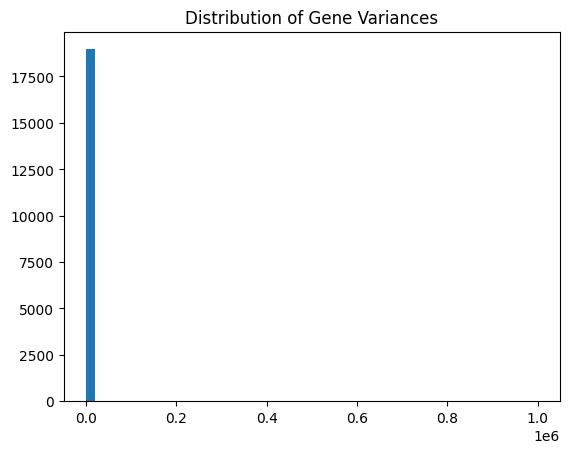

In [10]:
# Histogram of mean and variance across all genes
plt.hist(df.iloc[:, :-3].var(axis=0), bins=50)
plt.title("Distribution of Gene Variances")
plt.show()

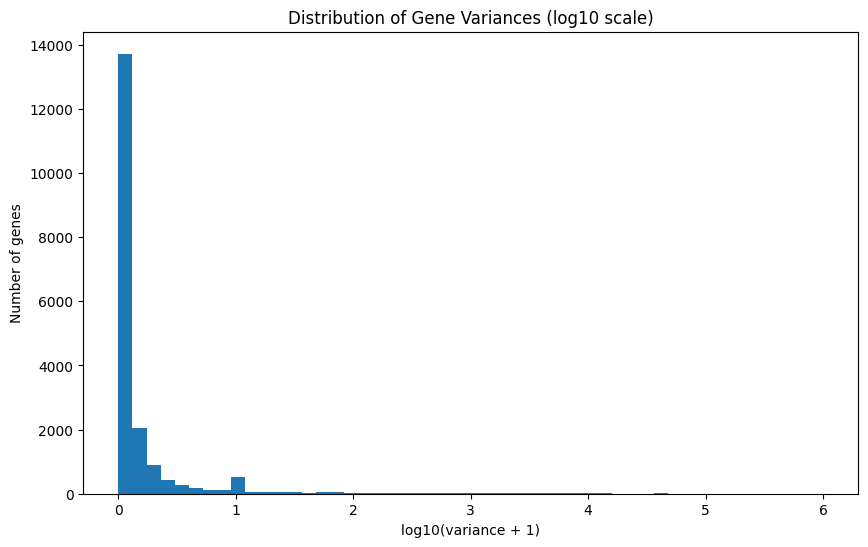

In [23]:
gene_var = df.iloc[:, :-3].var()

plt.figure(figsize=(10,6))
plt.hist(np.log10(gene_var + 1), bins=50)
plt.title("Distribution of Gene Variances (log10 scale)")
plt.xlabel("log10(variance + 1)")
plt.ylabel("Number of genes")
plt.savefig("../reports/figures/hist_var.png")
plt.show()


Most of genes have near-zero variance, they may be removed to reduce dimensionality.

## PCA

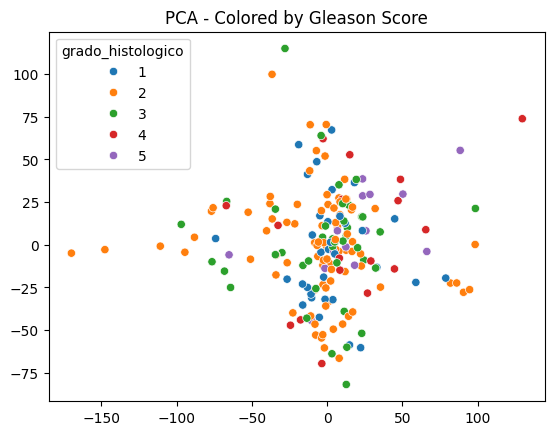

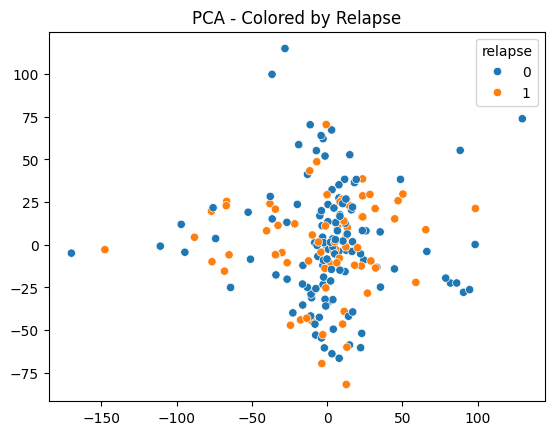

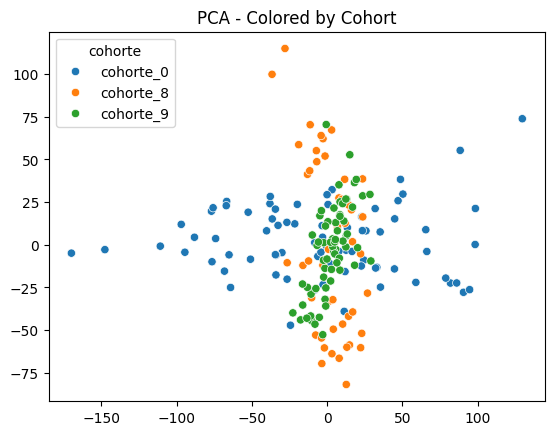

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

df_pca = df.dropna(subset=['grado_histologico']).copy()
df_pca['grado_histologico'] = df_pca['grado_histologico'].astype(int)

# Excluyo las 3 columnas clínicas para PCA
X = df_pca.iloc[:, :-3]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA colored by clinical variables
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca['grado_histologico'], palette="tab10")
plt.title("PCA - Colored by Gleason Score")
plt.show()

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca['relapse'])
plt.title("PCA - Colored by Relapse")
plt.show()

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca['cohorte'])
plt.title("PCA - Colored by Cohort")
plt.savefig('../reports/figures/pca_cohorte.png')
plt.show()


Only when colored by `cohorte` they seems to clusterize.

## Check Batch Effect

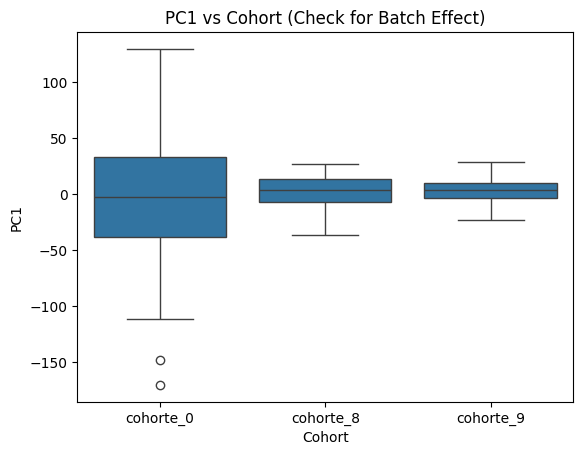

In [12]:
sns.boxplot(x=df_pca['cohorte'], y=X_pca[:,0])
plt.title("PC1 vs Cohort (Check for Batch Effect)")
plt.xlabel("Cohort")
plt.ylabel("PC1")
plt.savefig('../reports/figures/pc1_vs_cohorte.png')
plt.show()

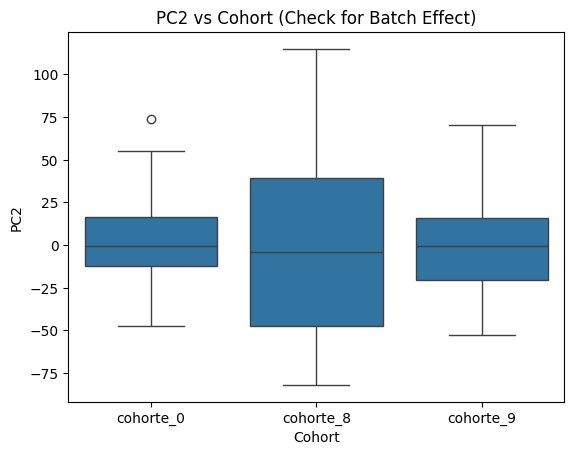

In [13]:
sns.boxplot(x=df_pca['cohorte'], y=X_pca[:,1])
plt.title("PC2 vs Cohort (Check for Batch Effect)")
plt.xlabel("Cohort")
plt.ylabel("PC2")
plt.savefig('../reports/figures/pc2_vs_cohorte.png')
plt.show()

They dont show so clear batch effect. They have more var in differents PC.

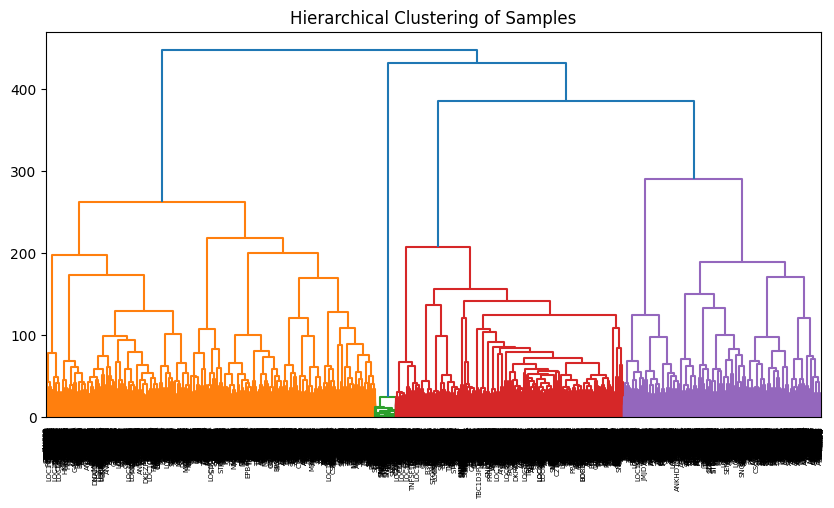

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, index=df_pca.index, columns=df_pca.columns[:-3])

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Distancia euclídea entre muestras
dists = pdist(X_scaled_df.T, metric='euclidean')
linkage_matrix = linkage(dists, method='ward')

# Dendrograma simple
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=X_scaled_df.columns)
plt.title("Hierarchical Clustering of Samples")
plt.show()
